In [1]:
import pandas as pd
import numpy as np

# Show entire dataframe cell contents

In [3]:
pd.set_option('display.max_colwidth', None)

# Sample Data

In [4]:
prices = pd.read_csv("portfolio.csv", index_col = 'date')
prices.head(1)

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,101.1385,308.52,78.45,524.81,49.8485


In [5]:
returns = prices.pct_change()
returns.head(2)

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.020517,-0.016061,-0.020846,-0.050896


# Make plots look nicer!

https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

In [53]:
import matplotlib.pyplot as plt
import seaborn

In [39]:
%pylab inline
rcParams['figure.figsize'] = (8,4)

Populating the interactive namespace from numpy and matplotlib


In [48]:
plt.style.available[:]

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [101]:
# permanantly set a style for plots
plt.style.use('seaborn')

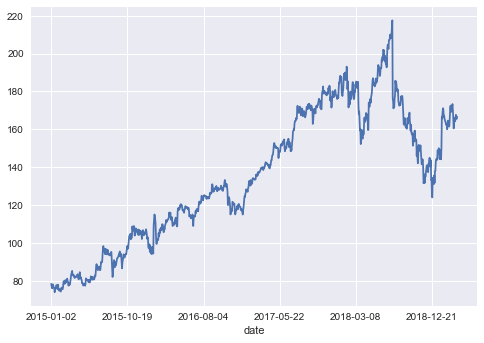

In [102]:
prices['FB'].plot()

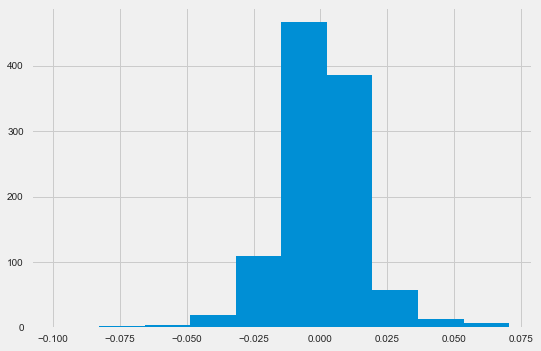

In [56]:
# temporary styling
with plt.style.context('fivethirtyeight'):
    returns['AAPL'].hist()

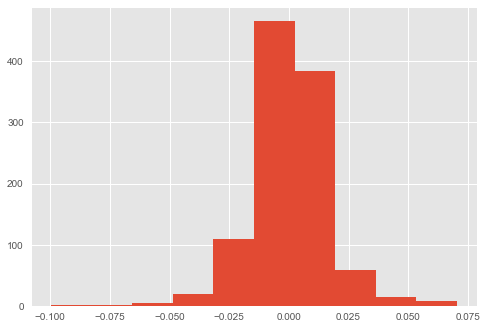

In [57]:
# temporary styling
with plt.style.context('ggplot'):
    returns['AAPL'].hist()

# Datetime

In [63]:
# turn index into date-time objects
returns.index = pd.to_datetime(returns.index)
returns.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.020517,-0.016061,-0.020846,-0.050896
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.017121
2015-01-07,0.014023,0.010600,0.000000,-0.001713,0.005191
2015-01-08,0.038422,0.006836,0.026592,0.003153,0.022172


# Portfolio Risk

#### Portfolio Annualized Covariance Matrix

In [22]:
# 252 trading days/year
annualizedCovarianceMatrix = returns.cov() * 252
annualizedCovarianceMatrix

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.063118,0.037599,0.032926,0.031483,0.039957
AMZN,0.037599,0.093749,0.049486,0.048395,0.063560
FB,0.032926,0.049486,0.082483,0.041922,0.049808
GOOG,0.031483,0.048395,0.041922,0.057460,0.049559
NFLX,0.039957,0.063560,0.049808,0.049559,0.185543


#### Portfolio Volatility

In [23]:
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

In [24]:
portfolioVolatility = np.transpose(weights) @ annualizedCovarianceMatrix @ weights
portfolioVolatility

0.054869742389783704

### Convert Daily values to Weekly/Quarterly values

In [64]:
# converts daily returns to quarterly average returns
returnsQuarterlyAverage = returns.resample('Q').mean()

# converts daily returns to weekly minimum returns
returnsWeeklyMinimum = returns.resample('W').min()

# Regression
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [ ]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = df['weight']
y = df['height']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

In [ ]:
# This procedure below is how the model is fit in Statsmodels
model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

In [ ]:
# we can extract the coefficients summary below:
results.summary2().tables[1]

# Replacing str values

https://stackoverflow.com/questions/31697043/replace-exact-substring-in-python

# Model Results
- https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-python-scikit-like-r-does

In [1]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Correlation Heatplot

#### option 1:

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def correlationHeatMap(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10,10)) 
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

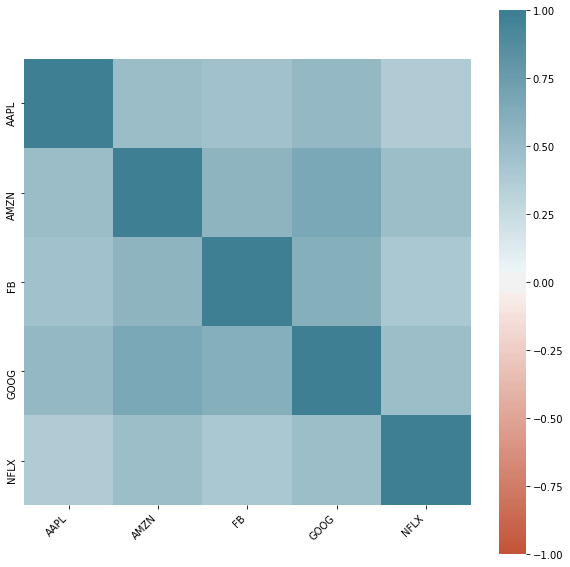

In [13]:
correlationHeatMap(returns)

#### option 2:

In [6]:
returns.corr().style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,1.000000,0.488785,0.456328,0.522783,0.369227
AMZN,0.488785,1.000000,0.562756,0.659374,0.481925
FB,0.456328,0.562756,1.000000,0.608949,0.402616
GOOG,0.522783,0.659374,0.608949,1.000000,0.479972
NFLX,0.369227,0.481925,0.402616,0.479972,1.000000


# Feature Selection

### Remove Highly Correlated Features (one of the pairs)

In [1]:
def remove_highly_correlated_feature_pairs(df_temp, correlationThreshold):
    #correlationThreshold should be a decimal (90% -> 0.90)
    
    # https://stackoverflow.com/questions/29294983/
    corr_matrix = df_temp.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > correlationThreshold)]
    
    # returns both reduced dataframe and columns dropped
    return df_temp.drop(df_temp[to_drop], axis=1), to_drop

In [2]:
def return_features_from_selectKBest(X_train, y_train, k_input):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression, mutual_info_regression
    """
    SelectKBest removes all but the 'k' highest performing features 
    It identifies the "best performing features" (for regression models) 
    either with f_regression or mutual_info_regression    
    """
        
    # creates KBest model via fRegression then returns the k-features determined as important by the model
    model_KBest_fRegression = SelectKBest(f_regression, k=k_input)
    model_KBest_fRegression.fit(np.nan_to_num(X_train), y_train)
    mask_KBest = model_KBest_fRegression.get_support()
    list_KBest_fRegression_new_features = X_train.columns[mask_KBest]
    
    model_KBest_mutual_info_regression = SelectKBest(mutual_info_regression, k=k_input)
    model_KBest_mutual_info_regression.fit(np.nan_to_num(X_train), y_train)

    # https://stackoverflow.com/questions/39839112/
    mask_MIR = model_KBest_mutual_info_regression.get_support()
    list_KBest_mutual_info_regression_new_features = X_train.columns[mask_MIR]
    
    return list_KBest_fRegression_new_features, list_KBest_mutual_info_regression_new_features

# Subset Dataframe with list of columns

In [ ]:
df[[*list_of_columns]]

# Random Forest Regressor

In [1]:
def return_randomForest_results(X, y):
    from sklearn.ensemble import RandomForestRegressor
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(X, y)
    
    return regr

# Progress Bar on For Loops
http://qpleple.com/add-progress-bars-to-your-python-loops/

In [4]:
#!pip install progressbar

In [2]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [3]:
y = 0
for i in pbar(range(1000)):
    y += 1

100% |########################################################################|


# Convert datetime timezones
https://stackoverflow.com/questions/34789888/convert-datetime-columns-to-a-different-timezone-pandas